In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
import pandas_profiling
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Dataset/Data/train',
                                                 target_size=(256, 256),
                                                 batch_size= 64,
                                                 class_mode='categorical')

In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Dataset/Data/valid',
                                                        target_size = (256, 256),
                                                        batch_size = 64,
                                                        class_mode = 'categorical')

In [ ]:
classifier = Sequential()
#Creating the method for model
#Step 1- Convolution
classifier.add(Convolution2D(128, (3, 3), input_shape = (256, 256,3), activation = 'relu'))

#adding another layer
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))

#Max pooling it
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))


#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))


#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [ ]:
#Step 3- Flattening
classifier.add(Flatten())

#Step 4- Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#For the output step
classifier.add(Dense(units = 4, activation = 'softmax'))
classifier.add(Dropout(0.01))

In [ ]:
classifier.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:

checkpointer = keras.callbacks.ModelCheckpoint(filepath = 'D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/checkp.hdf5', monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

plot_compare_1 = classifier.fit_generator(training_set,
                    steps_per_epoch=(1600/64),
                    epochs = 5,
                    validation_data=test_set,
                    validation_steps=(1600/64), callbacks = [checkpointer])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
25/25 [==============================] - 1049s 42s/step - loss: 1.5226 - accuracy: 0.3156 - val_loss: 1.2250 - val_accuracy: 0.4694
Epoch 2/5
25/25 [==============================] - 410s 16s/step - loss: 1.4185 - accuracy: 0.3725 - val_loss: 1.0124 - val_accuracy: 0.4800
Epoch 3/5
25/25 [==============================] - 310s 12s/step - loss: 1.3588 - accuracy: 0.3913 - val_loss: 1.2150 - val_accuracy: 0.2931
Epoch 4/5
25/25 [==============================] - 194s 8s/step - loss: 1.2782 - accuracy: 0.4825 - val_loss: 0.8699 - val_accuracy: 0.4913
Epoch 5/5
25/25 [==============================] - 150s 6s/step - loss: 1.1547 - accuracy: 0.5487 - val_loss: 0.6276 - val_accuracy: 0.6369


In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        9

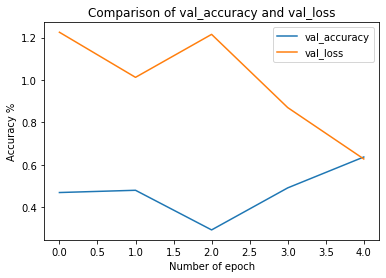

In [ ]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare_1.history['val_accuracy'])
pllt.plot(plot_compare_1.history['val_loss'])
pllt.title('Comparison of val_accuracy and val_loss')
pllt.ylabel('Accuracy %')
pllt.xlabel('Number of epoch')
pllt.legend(['val_accuracy', 'val_loss'])
pllt.show()

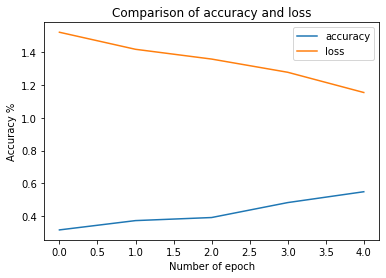

In [ ]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare_1.history['accuracy'])
pllt.plot(plot_compare_1.history['loss'])
pllt.title('Comparison of accuracy and loss')
pllt.ylabel('Accuracy %')
pllt.xlabel('Number of epoch')
pllt.legend(['accuracy', 'loss'])
pllt.show()